## Finite Difference Method of Solving Differential Equations 

This talk is divided into 2 parts: the first part is meant to setup the mathematical basis of the entire concept of finite differences. After that the rest is easy: we code!

The first part will include mostly board work, although I will share the notebook for reference. Still, if you feel like it, you can take notes.

### The Theory

* #### Introduction to Finite Differences


So, the entire concept of finite difference method finds it basis in finding the finite difference approximate of the value of a function. If you want to go into a bit more rigour, 

"In general, a _finite difference_ approximate to the value of some derivative of a function $u(x)$ at a point $x_{0}$ in its domain, say $u^{\prime}\left(x_{0}\right)$ or $u^{\prime \prime}\left(x_{0}\right)$, relies on a suitable combination of sampled function values at nearby points."

 The underlying formalism used to construct these approximation formulae is known as the calculus of finite differences. Its development has a long and influential history, dating back to Newton.

 What does this mean exactly? Let me explain. In very watered down terms, that we are trying to approximate the derivative of a function as a combination (some addition/subtraction) of the value of the function itself at nearby points on the graph.

 So, if we say have some curve represented by some function f(x), and we can represent the curve as a series of plotted points. Consider the set of data points $\left\{x_{i}, f_{i}\right\}=\left\{x_{i}, f\left(x_{i}\right)\right\}(i=1, \ldots, N)$ that represent a function $f(x)$. Here are some examples of the finite-difference formulas for approximating the slope (the derivative of the function) at the data points.

$$
\begin{aligned}
& \text { First: } \quad f^{\prime}\left(x_{1}\right) \approx\left[\frac{2 x_{1}-x_{2}-x_{3}}{\left(x_{2}-x_{1}\right)\left(x_{3}-x_{1}\right)}\right] f_{1} \\
& +\left[\frac{x_{3}-x_{1}}{\left(x_{2}-x_{1}\right)\left(x_{3}-x_{2}\right)}\right] f_{2} \\
& +\left[\frac{x_{1}-x_{2}}{\left(x_{3}-x_{2}\right)\left(x_{3}-x_{1}\right)}\right] f_{3} \\
& \text { Last: } \quad f^{\prime}\left(x_{N}\right) \approx\left[\frac{x_{N}-x_{N-1}}{\left(x_{N}-x_{N-2}\right)\left(x_{N-1}-x_{N-2}\right)}\right] f_{N-2} \\
& +\left[\frac{x_{N-2}-x_{N}}{\left(x_{N-1}-x_{N-2}\right)\left(x_{N}-x_{N-1}\right)}\right] f_{N-1} \\
& +\left[\frac{2 x_{N}-x_{N-1}-x_{N-2}}{\left(x_{N}-x_{N-1}\right)\left(x_{N}-x_{N-2}\right)}\right] f_{N} \\
& \text { Intermediate: } \quad f^{\prime}\left(x_{i}\right) \approx\left[\frac{x_{i}-x_{i+1}}{\left(x_{i+1}-x_{i-1}\right)\left(x_{i}-x_{i-1}\right)}\right] f_{i-1} \\
& +\left[\frac{2 x_{i}-x_{i-1}-x_{i+1}}{\left(x_{i}-x_{i-1}\right)\left(x_{i}-x_{i+1}\right)}\right] f_{i} \\
& +\left[\frac{x_{i}-x_{i-1}}{\left(x_{i+1}-x_{i-1}\right)\left(x_{i+1}-x_{i}\right)}\right] f_{i+1} \quad(i=2, \ldots, N-1)
\end{aligned}
$$

Don't get scared, these expressions are just for example, to illustrate this is what a finite difference approximation of the value of the derivative of a function f(x) looks like. I will very briefly show you how we can arrive at those values in just a very short time, and how we can actually use these to solve a few complicated differential equations. 

However, for simplicity, we shall assume that our intervals are evenly spaced (i.e. $\Delta x=x_{i+1}-x_i =h$ for all $i=2, \ldots, N$ i.e. for whatever $x_i$ or $x_{i+1}$ may be).

When the data points are evenly spaced then these formulas simplify considerably.

$$
\begin{aligned}
& \text { First: } \quad f^{\prime}\left(x_{1}\right) \approx \frac{-3 f_{1}+4 f_{2}-f_{3}}{2 h} \\
& \text { Last: } \quad f^{\prime}\left(x_{N}\right) \approx \frac{f_{N-2}-4 f_{N-1}+3 f_{N}}{2 h} \\
& \text { Intermediate: } \quad f^{\prime}\left(x_{i}\right) \approx \frac{f_{i+1}-f_{i-1}}{2 h} \quad(i=2, \ldots, N-1)
\end{aligned}
$$

These are second-order formulas, because the errors scale like $h^{2}$. An equally accurate estimate for the second derivative is as follows.

$$
f^{\prime \prime}\left(x_{i}\right) \approx \frac{f_{i+1}-2 f_{i}+f_{i-1}}{h^{2}} \quad(i=2, \ldots, N-1)
$$



### Arriving at the formulae

![Forward difference](https://cdn.mathpix.com/cropped/2024_02_12_6abbe04e0eb7802bf7adg-03.jpg?height=434&width=570&top_left_y=195&top_left_x=390)

_Forward difference_

![Central difference](https://cdn.mathpix.com/cropped/2024_02_12_6abbe04e0eb7802bf7adg-03.jpg?height=428&width=569&top_left_y=195&top_left_x=1190)

_Central difference_

We begin with the first order derivative. The simplest finite difference approximation is the ordinary difference quotient

$$
\frac{u(x+h)-u(x)}{h} \approx u^{\prime}(x)
$$

that appears in the original calculus definition of the derivative. Indeed, if $u$ is differentiable at $x$, then $u^{\prime}(x)$ is, by definition, the limit, as $h \rightarrow 0$ of the finite difference quotients. Geometrically, the difference quotient measures the slope of the secant line through the two points $(x, u(x))$ and $(x+h, u(x+h))$ on the graph of the function. 

(For context: A secant line is a straight line that connects two points on the curve of a function f(x). A secant line, also known as a secant, is basically a line that passes through two points on a curve. It tends to a tangent line when one of the two points is brought towards the other one.) 

For small $h$, this should be a reasonably good approximation to the slope of the tangent line, $u^{\prime}(x)$, as illustrated in the first picture. Throughout our discussion, h, the step size, which may be either positive or negative, is assumed to be small: $|h| \ll 1$. When $h>0$, is referred to as a forward difference, while $h<0$ yields a backward difference.

How close an approximation is the difference quotient? To answer this question, we assume that $u(x)$ is at least twice continuously differentiable, and examine its first order Taylor expansion

$$
u(x+h)=u(x)+u^{\prime}(x) h+\frac{1}{2} u^{\prime \prime}(\xi) h^{2}
$$

at the point $x$. We have used the Cauchy form for the remainder term, (read more ![here](http://www.sci.brooklyn.cuny.edu/~mate/misc/taylor.pdf)), in which $\xi$, which depends on both $x$ and $h$, is a point lying between $x$ and $x+h$. Rearranging (5.2), we find

$$
\frac{u(x+h)-u(x)}{h}-u^{\prime}(x)=\frac{1}{2} u^{\prime \prime}(\xi) h .
$$

Thus, the error in the finite difference approximation (5.1) can be bounded by a multiple of the step size:

$$
\left|\frac{u(x+h)-u(x)}{h}-u^{\prime}(x)\right| \leq C|h|
$$

where $C=\max \frac{1}{2}\left|u^{\prime \prime}(\xi)\right|$ depends on the magnitude of the second derivative of the function

 Since the error is proportional to the first power of $h$, we say that the finite difference quotient is a first order approximation to the derivative $u^{\prime}(x)$. When the precise formula for the error is not so important, we will write

$$
u^{\prime}(x)=\frac{u(x+h)-u(x)}{h}+\mathrm{O}(h) .
$$

The "big Oh" notation $\mathrm{O}(h)$ refers to a term that is proportional to $h$, or, more rigorously, bounded by a constant multiple of $h$ as $h \rightarrow 0$.

#### Example (may/may not show them)

Example 5.1. Let $u(x)=\sin x$. Let us try to approximate

$$
u^{\prime}(1)=\cos 1=.5403023 \ldots
$$

by computing finite difference quotients

$$
\cos 1 \approx \frac{\sin (1+h)-\sin 1}{h}
$$

The result for smaller and smaller (positive) values of $h$ is listed in the following table.


$h$ & .1 & .01 & .001 & .0001 \\
approximation & .497364 & .536086 & .539881 & .540260 \\
error & -.042939 & -.004216 & -.000421 & -.000042


We observe that reducing the step size by a factor of $\frac{1}{10}$ reduces the size of the error by approximately the same factor. Thus, to obtain 10 decimal digits of accuracy, we anticipate needing a step size of about $h=10^{-11}$. The fact that the error is more or less proportional to the step size confirms that we are dealing with a first order numerical approximation.

To approximate higher order derivatives, we need to evaluate the function at more than two points. In general, an approximation to the $n^{\text {th }}$ order derivative $u^{(n)}(x)$ requires at least $n+1$ distinct sample points. 

For example, let us try to approximate $u^{\prime \prime}(x)$ by sampling $u$ at the particular points $x$, $x+h$ and $x-h$. Which combination of the function values $u(x-h), u(x), u(x+h)$ should be used? The answer to such a question can be found by consideration of the relevant Taylor expansions 

$$
\begin{aligned}
& u(x+h)=u(x)+u^{\prime}(x) h+u^{\prime \prime}(x) \frac{h^{2}}{2}+u^{\prime \prime \prime}(x) \frac{h^{3}}{6}+\mathrm{O}\left(h^{4}\right), \\
& u(x-h)=u(x)-u^{\prime}(x) h+u^{\prime \prime}(x) \frac{h^{2}}{2}-u^{\prime \prime \prime}(x) \frac{h^{3}}{6}+\mathrm{O}\left(h^{4}\right),
\end{aligned}
$$

where the error terms are proportional to $h^{4}$. Adding the two formulae together gives

$$
u(x+h)+u(x-h)=2 u(x)+u^{\prime \prime}(x) h^{2}+\mathrm{O}\left(h^{4}\right) .
$$

Dividing by $h^{2}$ and rearranging terms, we arrive at the centered finite difference approximation to the second derivative of a function:

$$
u^{\prime \prime}(x)=\frac{u(x+h)-2 u(x)+u(x-h)}{h^{2}}+\mathrm{O}\left(h^{2}\right) .
$$

Since the error is proportional to $h^{2}$, this forms a second order approximation.

### The Code

All said and done, now we can actually get to the coding part. If you have been able to bear with me up until now, then the rest should be easier (thanks for staying back up until now! )

We are going out to launch a rocket, and let $y(t)$ is the altitude (meters from the surface) of the rocket at time t. We know the gravity $g=9.8m/s^2$. If we want to have the rocket at 50 m off the ground after 5 seconds after launching, what should be the velocity at launching? (we ignore the drag of the air resistance, as always).

To answer this question, we can frame the problem into a boundary value problem for a second-order ODE. The ODE is:
$\frac{d^2y}{dt^2}=−g$

with the two boundary conditions as: y(0)=0
and y(5)=50. And we want to answer the question, what’s y′(0) at launching?

This is a quite simple question, we can solve it analytically easily, with the correct answer y′(0)=34.5. However, let's solve it using the Finite Difference method.

Since the time interval is [0,5] and if we take n=10, therefore, h=0.5, using the finite difference approximated derivatives, we have

$$
y_0=0
\\
y_{i−1}−2y_i+y_{i+1}=−gh^2,i=1,2,...,n−1
\\
y_{10}=50
$$

if we use matrix notation, we will have:

$$\begin{bmatrix}
1 & 0 & & & \\
1 & -2 & 1 & &  \\
 & \ddots & \ddots & \ddots & \\
 & & 1& -2& 1 \\
 & & & &1
\end{bmatrix}\left[\begin{array}{c} y_0 \\y_1 \\ ... \\ y_{n-1}\\y_n \end{array}\right] =
\left[\begin{array}{c} 0 \\-gh^2 \\ ... \\ -gh^2 \\50\end{array}\right]$$

Therefore, we have 11 equations in the system, we can solve it

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[ 0.   -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 50.  ]


/tmp/ipykernel_68699/711849607.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


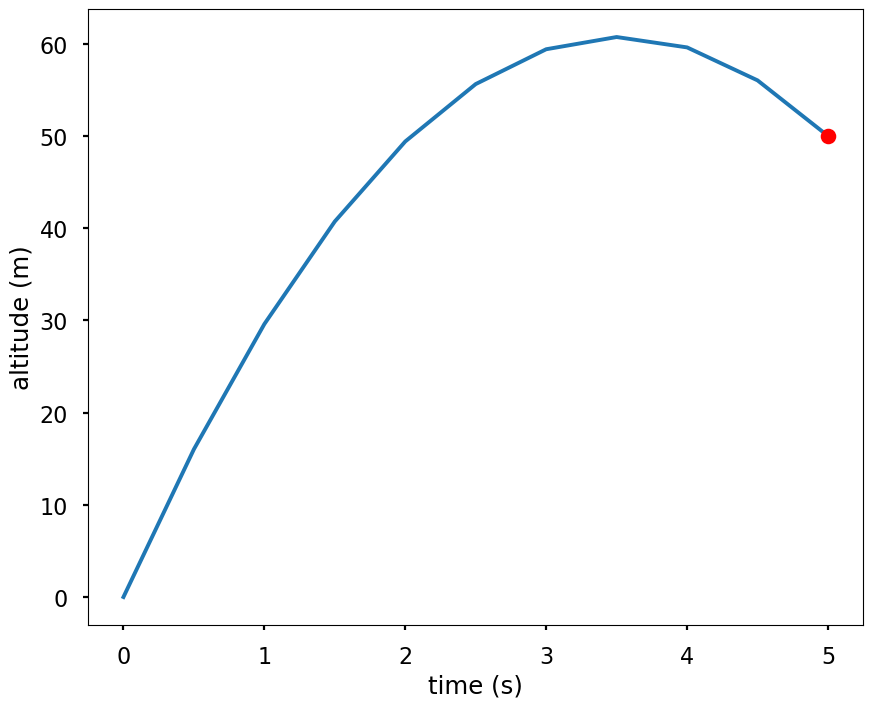

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

n = 10
h = (5-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
b[1:-1] = -9.8*h**2
b[-1] = 50
print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

t = np.linspace(0, 5, n+1)

plt.figure(figsize=(10,8))
plt.plot(t, y)
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()

Now, let's solve $y'(0)$, from the finite difference formula, we know that $\frac{dy}{dx} = \frac{y_{i+1}-y_{i-1}}{2h}$, which means that $y'(0) = \frac{y_{1} - y_{-1}}{2h}$, but we don't know what is $y_{-1}$. Actually, we can calculate $y_{-1}$ since we know the $y$ values on each grid point. From the 2nd derivative finite difference formula, we know that $\frac{y_{-1}-2y_0+y_{1}}{h^2} = -g$, therefore, we can solve for $y_{-1}$ and then get the launching velocity. See the calculation below. 

In [2]:
y_n1 = -9.8*h**2 + 2*y[0] - y[1]
print(y_n1)
print(y[1])
print(y[0])
print(h)
(y[1] - y_n1) / (2*h)

-18.474999999999998
16.025
0.0
0.5


34.5

Using finite difference method to solve the following linear boundary value problem

$$ y'' = -4y +4x $$

with the boundary conditions as $y(0) = 0$ and $y'(\pi/2)=0$. The exact solution of the problem is $y=x-sin2x$, plot the errors against the n grid points (n from 3 to 100) for the boundary point $y(\pi/2)$. 

Using the finite difference approximated derivatives, we have 

$$ y_0 = 0$$

$$ y_{i-1} - 2y_i + y_{i+1} -h^2(-4y_i+4x_i)=0 , \;i = 1, 2, ..., n-1$$

$$ 2y_{n-1}-2y_n -h^2(-4y_n+4x_n)=0$$

The last equation is derived from the fact that $\frac{y_{n+1}-y_{n-1}}{2h} = 0$ (the boundary condition $y'(\pi/2)=0$). Therefore, $y_{n+1}=y_{n-1}$. 

if we use matrix notation, we will have:

$$\begin{bmatrix}
1 & 0 & & & \\
1 & -2+4h^2 & 1 & &  \\
 & \ddots & \ddots & \ddots & \\
 & & 1& -2+4h^2 & 1 \\
 & & & 2 &-2+4h^2
\end{bmatrix}\left[\begin{array}{c} y_0 \\y_1 \\ ... \\ y_{n-1}\\y_n \end{array}\right] =
\left[\begin{array}{c} 0 \\4h^2x_1 \\ ... \\ 4h^2x_{n-1} \\4h^2x_{n}\end{array}\right]$$

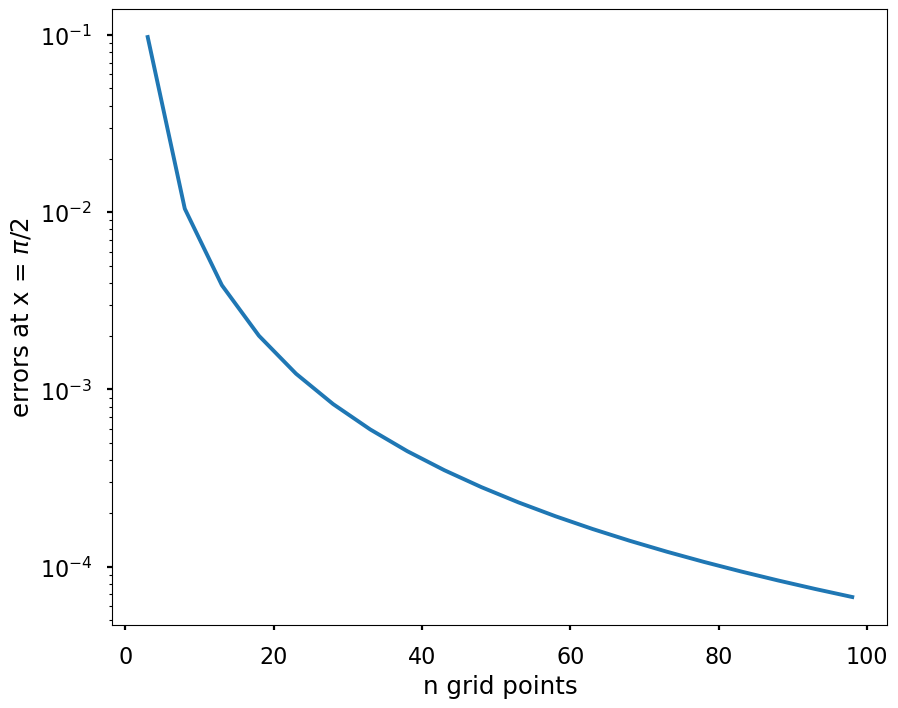

In [3]:
def get_a_b(n):
    h = (np.pi/2-0) / n
    x = np.linspace(0, np.pi/2, n+1)
    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = -2+4*h**2
    A[n, n-1] = 2
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2+4*h**2
        A[i, i+1] = 1

    # Get b
    b = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = 4*h**2*x[i]
    
    return x, A, b

x = np.pi/2
v = x - np.sin(2*x)

n_s = []
errors = []

for n in range(3, 100, 5):
    x, A, b = get_a_b(n)
    y = np.linalg.solve(A, b)
    n_s.append(n)
    e = v - y[-1]
    errors.append(e)
    
plt.figure(figsize = (10,8))
plt.plot(n_s, errors)
plt.yscale('log')
plt.xlabel('n grid points')
plt.ylabel('errors at x = $\pi/2$')
plt.show()

We can see with denser grid points, we are approaching the exact solution on the boundary point. 

The finite difference method can be also applied to higher-order ODEs, but it needs approximation of the higher-order derivatives using the finite difference formula. For example, if we are solving a fourth-order ODE, we will need to use the following:

$$\frac{d^4y}{dx^4} = \frac{y_{i-2}-4y_{i-1}+6y_i-4y_{i+1}+y_{i+2}}{h^4}$$

We won't talk more on the higher-order ODEs, since the idea behind to solve it is similar to the second-order ODE we discussed above. 